### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(42)

In [68]:
tf.__version__

'1.15.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [71]:
print('Shape of trainX : {}\nShape of trainY: {}'.format(trainX.shape, trainY.shape))
print('Shape of testX : {}\nShape of testY: {}'.format(testX.shape, testY.shape))

Shape of trainX : (60000, 28, 28)
Shape of trainY: (60000,)
Shape of testX : (10000, 28, 28)
Shape of testY: (10000,)


In [72]:
print('dtype of trainX : {}\ndtype of trainY: {}'.format(trainX.dtype, trainY.dtype))
print('dtype of testX : {}\ndtype of testY: {}'.format(testX.dtype, testY.dtype))

dtype of trainX : uint8
dtype of trainY: uint8
dtype of testX : uint8
dtype of testY: uint8


In [73]:
print(trainY[0:5])

[9 0 0 3 0]


In [74]:
print(testY[0:5])

[9 2 1 1 6]


In [75]:
#unique classes in dataset
print(np.unique(testY))

[0 1 2 3 4 5 6 7 8 9]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
#Take a copy of trainY and testY as we are one-hot encoding the labels
trainlabelsY = trainY
testlabelsY = testY

In [0]:
#Convert trainY and testY into one-hot encoded vectors.The dtype also changes to float32
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [78]:
#Check trainY shape, dtype is float32, values are 0 and 1
print('Shape of trainY:', trainY.shape)
print('dtype of trainY:', trainY.dtype)
print('First 5 examples in trainY now are: \n', trainY[0:5])

Shape of trainY: (60000, 10)
dtype of trainY: float32
First 5 examples in trainY now are: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [79]:
#Check testY shape, dtype is float32, values are 0 and 1
print('Shape of testY:', testY.shape)
print('dtype of testY:', testY.dtype)
print('First 5 examples in testY now are:\n', testY[0:5])

Shape of testY: (10000, 10)
dtype of testY: float32
First 5 examples in testY now are:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

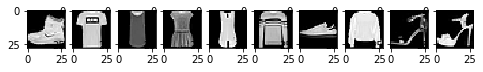

[9 0 0 3 0 2 7 2 5]


In [81]:
#using imshow method in matlpotlib.image print the first 10 images in trainingset - from trainX
plt.figure(figsize=(8, 8))
for i in range(10):    
    plt.subplot(2, 10, i + 1)    
    plt.imshow(trainX[i,:].reshape([28,28]), cmap='gray')
plt.show()

#Also print the labels for the first 10 images in trainingset - from trainY
print(trainlabelsY[0:9])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Building a Neural Network without Batch Normalization

#Initialize Sequential model
model1 = tf.keras.models.Sequential()

#Reshape input data from 2D to 1D -> 28x28 to 784
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add Dense Layer which provides 10 Outputs after applying softmax as we have 10 classes
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model with a cross entropy loss function and sgd optimizer
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


### Execute the model using model.fit()

In [83]:
#Fit the model on trainX,trainY and validate using testX,testY

model1.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 50us/sample - loss: 2020.4083 - acc: 0.7412 - val_loss: 1385.7173 - val_acc: 0.7801
Epoch 2/30
60000/60000 [==============================] - 3s 46us/sample - loss: 1592.0470 - acc: 0.7786 - val_loss: 1246.4447 - val_acc: 0.7758
Epoch 3/30
60000/60000 [==============================] - 3s 46us/sample - loss: 1548.6161 - acc: 0.7843 - val_loss: 974.7880 - val_acc: 0.8177
Epoch 4/30
60000/60000 [==============================] - 3s 47us/sample - loss: 1552.1905 - acc: 0.7875 - val_loss: 1422.3983 - val_acc: 0.7882
Epoch 5/30
60000/60000 [==============================] - 3s 46us/sample - loss: 1473.1250 - acc: 0.7930 - val_loss: 1133.7114 - val_acc: 0.8104
Epoch 6/30
60000/60000 [==============================] - 3s 48us/sample - loss: 1479.7200 - acc: 0.7945 - val_loss: 1053.8536 - val_acc: 0.8051
Epoch 7/30
60000/60000 [==============================] - 3s 47us/sample - loss: 

#### Observations:
- Without using BatchNormalization layer the trainingset is not normalized, so the data is not scaled
- We observe that the training and validation loss is not reducing much and after 30 epochs the loss for trainingset is 1349 and for validationset is  1892, which is very high
- Also the validationset accuracy is only 75.8%
- So we should normalize the data using BatchNormalization layer to minimize the loss and get better accuracy
- In this model we have not added any hidden layers between the input and output layers, used sgd optmizer with default learning rate of 0.01, accuracy as the metrics and categorical_crossentropy as the loss function

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Building a Neural Network with Batch Normalization layer

#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Reshape input data from 2D to 1D -> 28x28 to 784
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data with BatchNormalization layer
model2.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax as we have 10 classes
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model with a cross entropy loss function and sgd optimizer
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [85]:
#Fit the model on trainX,trainY and validate using testX,testY

model2.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 67us/sample - loss: 0.5981 - acc: 0.7922 - val_loss: 0.5310 - val_acc: 0.8190
Epoch 2/30
60000/60000 [==============================] - 4s 63us/sample - loss: 0.4894 - acc: 0.8307 - val_loss: 0.4908 - val_acc: 0.8328
Epoch 3/30
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4687 - acc: 0.8394 - val_loss: 0.4944 - val_acc: 0.8332
Epoch 4/30
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4560 - acc: 0.8422 - val_loss: 0.4876 - val_acc: 0.8341
Epoch 5/30
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4505 - acc: 0.8440 - val_loss: 0.4872 - val_acc: 0.8368
Epoch 6/30
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4420 - acc: 0.8463 - val_loss: 0.4854 - val_acc: 0.8370
Epoch 7/30
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4408 - acc: 0.8479 - val_loss: 0.

#### Observations:
- After using BatchNormalization layer the trainingset is normalized, so the data is now scaled
- We observe that the training and validation loss is now reducing more and after 30 epochs the loss is minimized to a good extent and the accuracy also has increased a lot
- Loss for trainingset is 0.41 and for validationset is 0.46, after 30 epochs, which is very less.So the loss has minimized
- The validationset accuracy is 84.3% which is much more compared to 75.8% obtained from model1
- This model shows that we always need to normalize the data using BatchNormalization layer before we build the model
- In this model we have not added any hidden layers between the input and output layers, used sgd optmizer with default learning rate of 0.01, accuracy as the metrics and categorical_crossentropy as the loss function

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#Build a Neural Network with learning rate set to 0.001 in sgd optimizer

#Initialize Sequential model
model3 = tf.keras.models.Sequential()

#Reshape input data from 2D to 1D -> 28x28 to 784
model3.add(tf.keras.layers.Reshape((784,), input_shape=(28,28,)))

#Normalize the data with BatchNormalization layer
model3.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax as we have 10 classes
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

#Customize the learning rate to 0.001 in sgd optimizer
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

#Compile the model with a cross entropy loss function and sgd_optimizer with lr=0.001
model3.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [87]:
#Fit the model on trainX,trainY and validate using testX,testY

model3.fit(trainX, trainY, 
           validation_data=(testX,testY),
           epochs=30, 
           batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 66us/sample - loss: 0.9307 - acc: 0.6877 - val_loss: 0.6820 - val_acc: 0.7679
Epoch 2/30
60000/60000 [==============================] - 4s 64us/sample - loss: 0.6432 - acc: 0.7789 - val_loss: 0.6087 - val_acc: 0.7934
Epoch 3/30
60000/60000 [==============================] - 4s 62us/sample - loss: 0.5881 - acc: 0.7962 - val_loss: 0.5858 - val_acc: 0.8039
Epoch 4/30
60000/60000 [==============================] - 4s 62us/sample - loss: 0.5601 - acc: 0.8073 - val_loss: 0.5528 - val_acc: 0.8106
Epoch 5/30
60000/60000 [==============================] - 4s 63us/sample - loss: 0.5418 - acc: 0.8122 - val_loss: 0.5388 - val_acc: 0.8137
Epoch 6/30
60000/60000 [==============================] - 4s 64us/sample - loss: 0.5276 - acc: 0.8194 - val_loss: 0.5319 - val_acc: 0.8172
Epoch 7/30
60000/60000 [==============================] - 4s 61us/sample - loss: 0.5152 - acc: 0.8236 - val_loss: 0.

#### Observations:
- In this model we have not added any hidden layers between the input and output layers, used an sgd optmizer with learning rate of 0.001, accuracy as the metrics and categorical_crossentropy as the loss function
- We observe that there is no much change in the training and validation loss and the accuracy is also slightly less.
- This is because, we have lowered the learning rate by 10% from 0.01 to 0.001 and so the gradient descent optimizer will take more number of iterations(epochs) for converging the loss function to a minimum value.
- Loss for trainingset is 0.45 and for validationset is 0.47, after 30 epochs,so the loss has minimized
- The validationset accuracy is 83.6% which is slightly less compared to 84.3% obtained from model2
- This model shows that if we reduce the learning rate the number of iterations required for the loss function to converge to a minimum value will be more and so we have to increase the number of epochs

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and sigmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Build a Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer
#Use cross entropy loss function and sigmoid as activation in the hidden layers
#Use softmax as activation function in the output layer
#Use sgd optimizer with learning rate 0.03

#Initialize Sequential model
model4 = tf.keras.models.Sequential()

#Reshape input data from 2D to 1D -> 28x28 to 784
model4.add(tf.keras.layers.Reshape(target_shape=(784,), input_shape=(28,28)))

#Normalize the data with BatchNormalization layer()
model4.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer, Hidden Layer 1 with 100 neurons and activation function as sigmoid 
model4.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add Dense Layer, Hidden Layer 2 with 100 neurons and activation function as sigmoid
model4.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add Dense Layer, Hidden Layer 3 with 10 neurons and activation function as sigmoid
model4.add(tf.keras.layers.Dense(10, activation='sigmoid'))

#Add Dense Layer which provides 10 Outputs as we have 10 classes after 3 Hidden layers by applying activation function as softmax 
model4.add(tf.keras.layers.Dense(10, activation='softmax'))


### Compile the model

In [0]:
#Use cross entropy loss function
#Use sgd optimizer with learning rate 0.03

sgd_optimizer2 = tf.keras.optimizers.SGD(learning_rate=0.03)
model4.compile(optimizer=sgd_optimizer2, loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [90]:
#Fit the model on trainX,trainY and validate using testX,testY

model4.fit(trainX, trainY,
           validation_data=(testX, testY),
           epochs=30,
           batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 95us/sample - loss: 1.8136 - acc: 0.4078 - val_loss: 1.3095 - val_acc: 0.5440
Epoch 2/30
60000/60000 [==============================] - 5s 88us/sample - loss: 1.1423 - acc: 0.6119 - val_loss: 0.9652 - val_acc: 0.6788
Epoch 3/30
60000/60000 [==============================] - 5s 89us/sample - loss: 0.8679 - acc: 0.7128 - val_loss: 0.7662 - val_acc: 0.7464
Epoch 4/30
60000/60000 [==============================] - 5s 88us/sample - loss: 0.7173 - acc: 0.7583 - val_loss: 0.6529 - val_acc: 0.7740
Epoch 5/30
60000/60000 [==============================] - 5s 88us/sample - loss: 0.6260 - acc: 0.7815 - val_loss: 0.5836 - val_acc: 0.7922
Epoch 6/30
60000/60000 [==============================] - 5s 89us/sample - loss: 0.5684 - acc: 0.8004 - val_loss: 0.5459 - val_acc: 0.8028
Epoch 7/30
60000/60000 [==============================] - 5s 88us/sample - loss: 0.5271 - acc: 0.8209 - val_loss: 0.

#### Observations:
- In this model we have added 3 hidden layers between the input and output layers, used an sgd optmizer with learning rate of 0.03, accuracy as the metrics and categorical_crossentropy as the loss function
- We observe that when the learning rate is increased three times from 0.01 to 0.03, there is a huge change in the training and validation loss and the accuracy is also increased.
- This change is because, we have increased the learning rate to 0.03 and so the gradient descent optimizer will take less number of iterations(epochs) for converging the loss function to a minimum value.
- Also, we have used sigmoid as activation function for building the neural networks and softmax as activation function to get the output layer for the probabilities to get evenly distributed for all classes.This is ideal for multi-class classification.
- Loss for trainingset is 0.25 and for validationset is 0.35, after 30 epochs,so the loss has minimized
- The validationset accuracy is 87.6% which is slightly less compared to 83.6% obtained from model3
- This model shows that if we add hidden layers loss will be very minimal and also we get a good accuracy.
- So model4 is the best model of all the four models we have built.

## Review model

In [102]:
#get model summary of total weights and bias
model4.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_11 (Reshape)         (None, 784)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 784)               3136      
_________________________________________________________________
dense_17 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                110       
Total params: 92,856
Trainable params: 91,288
Non-trainable params: 1,568
_____________________________________________

In [0]:
#get all the weights obtained
all_weights= model4.get_weights()

### Run the model

In [107]:
#Expand the dimensions of test data from 1D to 2D (784,1) to (28,28) 
input_data = np.expand_dims(testX[0], axis=0)
input_data.shape

(1, 28, 28)

In [109]:
#Run the model on test data and get predicted probabilities
pred = model4.predict(input_data)
pred

array([[2.7069038e-05, 7.8161725e-07, 2.5206429e-04, 2.3489063e-06,
        2.0187224e-05, 2.9720282e-03, 9.2620132e-05, 3.9974996e-03,
        2.8346665e-03, 9.8980075e-01]], dtype=float32)

In [115]:
#Sum of the predicted probabilities should be 1 as we have used softmax as activation function to get the output probabilities
np.sum(pred)

1.0

In [95]:
#shape of predicted probailities should be same as number of classes (1,10)
pred.shape

(1, 10)

In [116]:
#pred{0] is same as pred as there is only one row
pred[0]

array([2.7069038e-05, 7.8161725e-07, 2.5206429e-04, 2.3489063e-06,
       2.0187224e-05, 2.9720282e-03, 9.2620132e-05, 3.9974996e-03,
       2.8346665e-03, 9.8980075e-01], dtype=float32)

In [117]:
# The Index of Maximum Probability outcome is the predicted value
np.argmax(pred[0])

9

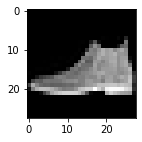

In [118]:
#Plot the image of the predicted value
plt.figure(figsize=(2,2))
plt.imshow(testX[0],cmap='gray')
plt.show()

In [119]:
# Validate the predicted value to the actual value in testY
np.argmax(testY[0])

9

##### Using the model we are able to match predicted value with actual value. 